<p style="text-align:left;"><img src="https://raw.githubusercontent.com/javierjevf/imdbNLP/master/movie3.png" alt="Drawing" style="width: 250px;"/></p>

<h1 style='text-align: center;'> Natural Language Processing </h1>
<a href='https://github.com/javierjevf'><h4 style='text-align: center;'> Javier Vázquez</h4> </a>

<p style="text-align:right;"><img src="https://raw.githubusercontent.com/javierjevf/imdbNLP/master/movie1.png" alt="Drawing" style="width: 250px;"/></p>

## Objectives:

1. Working with the IMDB's review dataset.
2. Use NLTK tools and Pandas to extract relevant information from the database.
3. Create visualizations to explore data and provide useful insight.
4. Train a model to classify a review into a positive or negative class.




## Loading requirements

In this project, which kind off seems like my personal notes on *Natural Languaje Processing*, I will be using the IMDB Dataset found on Kaggle. For further informaton on this please be sure to hop in: <https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews>. The dataset consists on roughly 50 thousand reviews gathered from IMDB. 

The first step is to sort out our *data*. In this case, it consists on finding out the best way to represent a text review, so that the Machine Learning algorithm can interpret it better and work with that representation mathematically. The libraries I'll be using the most are: Pandas to handle and wrangle the data, Pyplot and Seaborn for visualizations, Numpy for out math-related needs, NLTK for text analysis and feature extraction and SciKit Learn for the Machine Learning and some text processing algorithms. 

Lets load the data and apply some pre-processing to the text. Mainly, the idea is to remove markers that may cause unnecessary noise on the classification or analysis. Right now let's remove punctuation marks and convert every single character into lower case. Afterwards we will remove every word which doesn't add any value to the bag of words.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import  WordCloud
from PIL import Image
import pickle
import string
import nltk 
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
# nltk.download('averaged_perceptron_tagger')


%matplotlib inline
sns.set_style("darkgrid")

# Loading the original database
movies = pd.read_csv("IMDB Dataset.csv").drop_duplicates()

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc).lower()
    
    return nopunc

movies["review_nopunc"] = movies.review.apply(text_process)
movies["review_clean"] = movies.review_nopunc.apply(lambda x: [word for word in x.split() if word.lower() not in stopwords.words('english')])

# movies = pd.read_csv("clean_movies_database.csv",index_col=False)#.drop(["review","review_nopunc"],axis=1)
# movies.review_clean = movies.review_clean.apply(lambda x: [word.strip(''' "[']''') for word in x.split(",")]) 

## EDA

This is the first approach to understand the datain our hands. We can count the number of reviews labeled as positive and negative to get a broad idea of how evenly distributed the set is. 

AxesSubplot(0.125,0.125;0.775x0.755)
positive    24884
negative    24698
Name: sentiment, dtype: int64


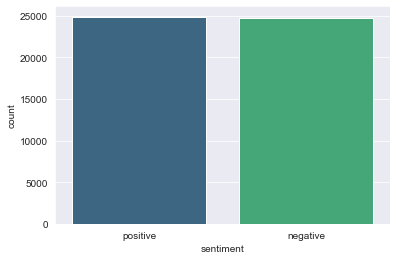

In [3]:
print(sns.countplot(data=movies.sentiment,x=movies.sentiment,palette="viridis"))
print(movies.sentiment.value_counts())

From the last computation it can be gathered that the database is very balanced between positive and negative labels. This is great because it means that it won't be an issue to even things out among the classes we're sorting out. And it is also very ncie to have pre-labeled data as it won't be necessary to develop any algorithm to get more information out of the text.

<AxesSubplot:ylabel='Frequency'>

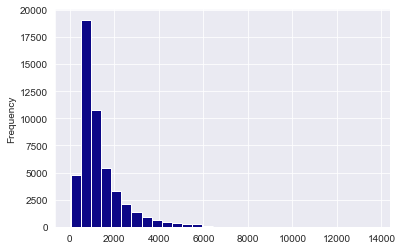

In [22]:
movies["length"]  = movies.review.apply(len)
movies.length.plot(bins=30,kind="hist",colormap="plasma")

Text(0, 0.5, 'Review length')

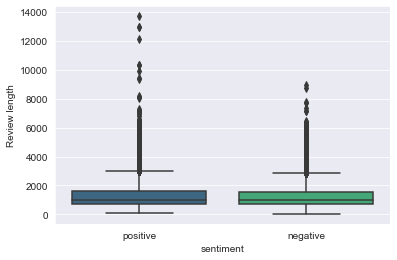

In [20]:
sns.boxplot(data=movies,x="sentiment",y=movies.review.apply(len),palette="viridis")
plt.ylabel("Review length")

In [6]:
movies.length.describe()

count    49582.000000
mean      1310.568230
std        990.762238
min         32.000000
25%        699.000000
50%        971.000000
75%       1592.000000
max      13704.000000
Name: length, dtype: float64

After very little feature engineering, (which is a fancy way to say we did some computations over the text) we can extract the length of every review and assign it to every review. With this we're able to  tell that most messages' length range from 340 to 2301 characters. There are significant outliers to this, but the mean length of the messages is 1310. 

## Lemmatization

There are many different ways to pre-process the data. One of the first steps taken on this dataset was removing stopwords and some punctuation marks. Lemmatization is an algorithm which will take in a word and assign it to its root, or *lemma*. This is very similar to stemming, which is the process of removing suffixes and prefixes to get the "raw" base of the word, also called a *stem*.

This is a bit more complex than my over-simplification above, but the result may vary depending on which kind of lemma you want to align the bag of words to. You may either lemmatize to nouns, adjectives or verbs, which means that some words will be switched to the infinitive form if its a verb, plural and some suffixes if its a noun and simplify the adjectives. Using a lemmatizer may provide a different result depending on the project than other techniques, but the best thing about using it, is that it returns an actual word. Thus, it will be simpler and cleaner to interpret it.  

Let's create a simple list that will act as a bag of words lemmatized to verbs:

In [7]:
lemmatizer = WordNetLemmatizer()

bag_of_verbs = []

for i in range(len(movies["review_clean"])):
    for word in movies["review_clean"][i]:
        word = lemmatizer.lemmatize(word,pos="v")
        bag_of_verbs.append(word)

print(bag_of_verbs[:10])

['one', 'reviewers', 'mention', 'watch', '1', 'oz', 'episode', 'youll', 'hook', 'right']


We can count the first 20 occurences ordered by the frequency they appear in a review, just to check more or less what's going on in the list we just created:

In [19]:
c_v = Counter(bag_of_verbs)
for item in c_v.most_common(20):
    print(item)

print(f"\nLength of the bag of  verbs:\t{len(c_v)}")

('br', 112957)
('film', 91438)
('movie', 82849)
('one', 50640)
('make', 43692)
('like', 42733)
('see', 40409)
('get', 34923)
('time', 29497)
('good', 28369)
('character', 27370)
('watch', 27003)
('go', 26734)
('even', 24833)
('would', 23826)
('think', 23796)
('really', 22778)
('story', 21948)
('show', 21160)
('well', 19159)

Length of the bag of  verbs:	168339


## Training a model.

 This will be a **SVM Classifier** trained on half the data set. Lemmatization is very useful on the text preprocessing for building a model, for the sake of the exercise, I'll work with the bag of words made out of verbs. 

 More information can be found on this subject on SciKit-Learn's own documentation on **Support Vector Machines** and a great explanation of this subject can be found here: <https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/>

In [9]:
# Importing from SciKit-Learn machine learning library:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

We're going to divide the data set into 2 different parts. The first one will be a traininig and testing set, and I'll mention the second split a bit further down.
Lets take the first half of the reviews and use them to create and fit a model with that information. We'll use 20% of that data to be a "test" data set that will be used to check if the model works correctly.

In [10]:
X = movies.review_clean[0:25000]
y = movies.sentiment[0:25000]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")

vectorizer = CountVectorizer(stop_words="english",binary=False)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X.apply(str))
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train.apply(str))
y_train_vectors = vectorizer.transform(y_train.apply(str))
X_test_vectors = vectorizer.transform(X_test.apply(str))
y_test_vectors = vectorizer.transform(y_test.apply(str))
print("Train/test split fitted into the bag of words vector.\n")

Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.



## Fitting a model and evaluation.

In [11]:
model = SVC(kernel="linear")
print(f"Model created, currently using:      {model}\n")
model.fit(X_train_vectors, y_train)
print("Model fitted with training vectors.\n")
print(f"Model mean average score:    {model.score(X_train_vectors, y_train)}\n")

predictions = model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(y_test, predictions))

Model created, currently using:      SVC(kernel='linear')

Model fitted with training vectors.

Model mean average score:    1.0

Model fitted with testing vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.86      0.85      0.86      2527
    positive       0.85      0.86      0.86      2473

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



It seems that our model has an F1-Score of .86, in layman's terms, this means that every time it predicts if a sentence or paragraph is either category, it has a 86% chance of correctly asigning the category it belongs in. This is a pretty high score, but it still is predicting on data it has been *fed*. What would happen if the text data has never been seen by our prediction model? 

## Validation testing

Here comes the second half of the data set! This one will be used to create a "blind" test on the model. This data has no replicated reviews or any leakage that may need to be considered.  So it works pretty well as a way to check what will happen with our model when it is fed with new text data.

In [13]:
data_sample = movies[25001:]

X_val_vectors = vectorizer.transform(data_sample.review_clean.apply(str))
y_val_vectors = vectorizer.transform(data_sample.sentiment)

predictions_newdata = model.predict(X_val_vectors)
print("Model fitted with testing vectors.\n")


Model fitted with testing vectors.



In [14]:
print(f" --- Classification report for {model}")
print(classification_report(data_sample.sentiment, predictions_newdata))

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.86      0.85      0.86     12212
    positive       0.86      0.86      0.86     12369

    accuracy                           0.86     24581
   macro avg       0.86      0.86      0.86     24581
weighted avg       0.86      0.86      0.86     24581



This is a good result given the data we were using! There are a couple of things to do to improve the accuracy and efficiency of this model. There may be a bit of overfitting given the high number of features we're using, but to reduce dimensionality it's important to find a way to choose the correct features out of our bag of words. But those are just some ideas, and that is work for another project!

## Sources

SciKitLearn 

    https://scikit-learn.org/stable/modules/svm.html#svm-classification

Keith Gali

    https://www.youtube.com/watch?v=M9Itm95JzL0
    https://www.youtube.com/watch?v=vyOgWhwUmec

KD Nuggets

    https://www.kdnuggets.com/2019/01/solve-90-nlp-problems-step-by-step-guide.html

Bruno Stecanella

    https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/
